## load and inspect data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from collections import defaultdict


In [10]:
# load the book dataset for processing
book_df = pd.read_csv('e:/Book-recommendations/recommendation_system/src/main/resources/data/Books.csv')
book_df

C:\Users\dan\AppData\Local\Temp\ipykernel_34512\4220847401.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  book_df = pd.read_csv('e:/Book-recommendations/recommendation_system/src/main/resources/data/Books.csv')


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [4]:
# load the ratings dataset for processing
ratings_df = pd.read_csv('e:/Book-recommendations/recommendation_system/src/main/resources/data/Ratings.csv')
ratings_df

C:\Users\dan\AppData\Local\Temp\ipykernel_34512\2935418094.py:3: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  book_df = pd.read_csv('e:/Book-recommendations/recommendation_system/src/main/resources/data/Books.csv')


,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


## explore data

the dims of the ratings df is:  (1149780, 3)  and the dims of the books df is:  (271360, 8)


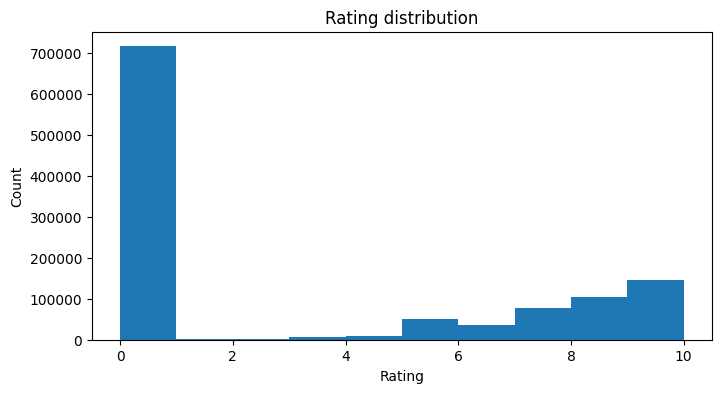

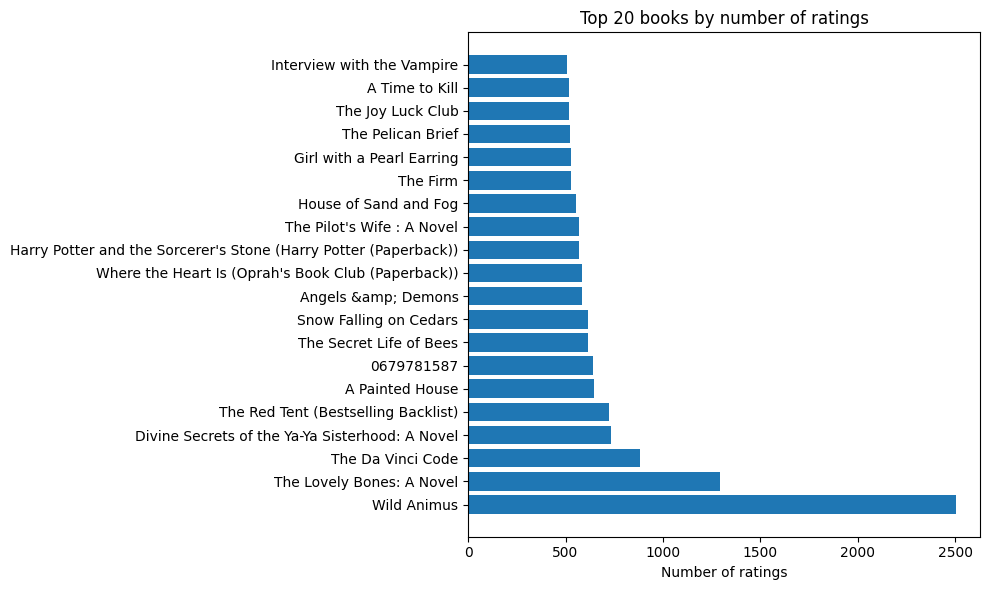

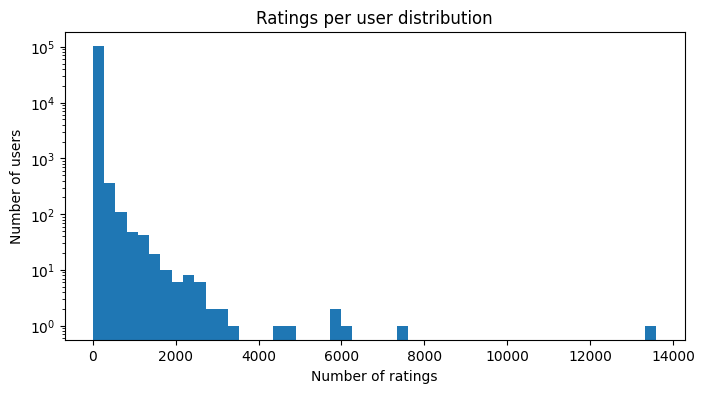

In [27]:
# quick dataset overview and plots
print("the dims of the ratings df is: ", ratings_df.shape, " and the dims of the books df is: ", book_df.shape)

import matplotlib.pyplot as plt

# Rating distribution
plt.figure(figsize=(8,4))
ratings_df['Book-Rating'].dropna().astype(float).hist(bins=10)
plt.title('Rating distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.grid(False)
plt.show()

# Top 20 books by number of ratings
book_counts = ratings_df.groupby('ISBN').size().sort_values(ascending=False).head(20)
# map ISBN to title (if available)
try:
    title_map = book_df.set_index('ISBN')['Book-Title'].to_dict()
    labels = [title_map.get(isbn, str(isbn)) for isbn in book_counts.index]
except Exception:
    labels = [str(isbn) for isbn in book_counts.index]

plt.figure(figsize=(10,6))
plt.barh(range(len(book_counts))[::-1], book_counts.values[::-1])
plt.yticks(range(len(book_counts))[::-1], labels[::-1])
plt.title('Top 20 books by number of ratings')
plt.xlabel('Number of ratings')
plt.tight_layout()
plt.show()

# Ratings per user distribution (long tail)
user_counts = ratings_df.groupby('User-ID').size()
plt.figure(figsize=(8,4))
plt.hist(user_counts, bins=50)
plt.title('Ratings per user distribution')
plt.xlabel('Number of ratings')
plt.ylabel('Number of users')
plt.yscale('log')
plt.show()

In [ ]:
n_users = ratings_df['User-ID'].nunique()
# Use ISBN as the item identifier (matches Ratings.csv)
n_items = ratings_df['ISBN'].nunique()

print(n_users, 'unique users')
print(n_items, 'unique items')

sparsity = 1 - len(ratings_df) / (n_users * n_items)
print('sparsity:', sparsity)

105283 unique users
242135 unique items
sparsity: 0.9999548976751832


## build models (Collaborative filtering / content based filtering / hybrid version)

In [ ]:
# CF model
import torch
from torch.autograd import Variable
from tqdm import tqdm

class CF(torch.nn.Module):
    def __init__(self, n_users, n_items, n_factors=20):
        super(CF, self).__init__()
        # user embeddings
        self.user_factors = torch.nn.Embedding(n_users, n_factors)  # latent user factors
        # item embeddings
        self.item_factors = torch.nn.Embedding(n_items, n_factors)  # latent item factors
        # user and item biases
        self.user_bias = torch.nn.Embedding(n_users, 1)
        self.item_bias = torch.nn.Embedding(n_items, 1)

        # initialize weights
        torch.nn.init.normal_(self.user_factors.weight, std=0.01)
        torch.nn.init.normal_(self.item_factors.weight, std=0.01)
        torch.nn.init.constant_(self.user_bias.weight, 0.0)
        torch.nn.init.constant_(self.item_bias.weight, 0.0)

    def forward(self, user, item):
        # user / item are expected as LongTensor of indices
        u = self.user_factors(user)
        v = self.item_factors(item)
        dot = (u * v).sum(dim=1)
        bias = self.user_bias(user).squeeze(1) + self.item_bias(item).squeeze(1)
        pred = dot + bias
        return pred

    def predict(self, user, item):
        # predict rating for a single user-item pair (accepts raw tensors or scalars)
        if not torch.is_tensor(user):
            user = torch.tensor([user], dtype=torch.long)
        if not torch.is_tensor(item):
            item = torch.tensor([item], dtype=torch.long)
        self.eval()
        with torch.no_grad():
            out = self.forward(user, item)
        return out.detach().cpu().numpy()[0]


In [ ]:
from torch.utils.data import DataLoader, Dataset

class RatingsDataset(Dataset):
    def __init__(self, ratings):
        # ratings: pandas DataFrame with columns 'User-ID','ISBN','Book-Rating'
        self.ratings = ratings.reset_index(drop=True)
        # build mappings for user and item to contiguous ids
        self.user2id = {u: i for i, u in enumerate(self.ratings['User-ID'].unique())}
        self.item2id = {i: j for j, i in enumerate(self.ratings['ISBN'].unique())}
        self.id2user = {v: k for k, v in self.user2id.items()}
        self.id2item = {v: k for k, v in self.item2id.items()}

        # map raw ids to indices
        self.user_ids = self.ratings['User-ID'].map(self.user2id).values.astype('int64')
        self.item_ids = self.ratings['ISBN'].map(self.item2id).values.astype('int64')
        # ensure rating column name is correct and numeric
        if 'Book-Rating' in self.ratings.columns:
            self.labels = pd.to_numeric(self.ratings['Book-Rating'], errors='coerce').fillna(0).astype('float32')
        else:
            raise ValueError('Ratings DataFrame must contain a Book-Rating column')

    def __len__(self):
        return len(self.ratings)

    def __getitem__(self, idx):
        return self.user_ids[idx], self.item_ids[idx], self.labels[idx]

In [ ]:
import torch

num_epochs = 20
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

print("using device:", device)

# create dataset and dataloader
train_dataset = RatingsDataset(ratings_df)
train_loader = DataLoader(train_dataset, batch_size=512, shuffle=True)

n_users = len(train_dataset.user2id)
n_items = len(train_dataset.item2id)

model = CF(n_users, n_items, n_factors=50)
print(model)
for name, param in model.named_parameters():
    if param.requires_grad:
        print(name, param.data.size())

model = model.to(device)

# MSE loss function
loss_fn = torch.nn.MSELoss()
# Adam optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=0.001)

# training loop (with gradient clipping and simple LR scheduler)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.5)
epoch_losses = []
for epoch in range(num_epochs):
    model.train()
    total_loss = 0.0
    for batch in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
        user, item, rating = batch
        user = user.to(device)
        item = item.to(device)
        rating = rating.to(device)

        optimizer.zero_grad()
        pred = model(user, item)
        loss = loss_fn(pred, rating)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=5.0)
        optimizer.step()

        total_loss += loss.item() * user.size(0)

    scheduler.step()
    avg_loss = total_loss / len(train_dataset)
    epoch_losses.append(avg_loss)
    print(f"Epoch {epoch+1} avg loss: {avg_loss:.4f}")

# plot training loss
import matplotlib.pyplot as plt
plt.figure()
plt.plot(range(1, len(epoch_losses)+1), epoch_losses, marker='o')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.grid(True)
plt.show()

# Example: get top-N for a user (scores on item embeddings)
def recommend_for_user(model, user_raw_id, dataset, topn=10, device=torch.device('cpu')):
    # map raw user id to internal index
    if user_raw_id not in dataset.user2id:
        return []
    user_idx = dataset.user2id[user_raw_id]
    model.eval()
    with torch.no_grad():
        user_vec = model.user_factors.weight[user_idx].to(device)
        item_vecs = model.item_factors.weight.to(device)
        scores = torch.matmul(item_vecs, user_vec)
        topk = torch.topk(scores, topn)
        item_idxs = topk.indices.cpu().numpy().tolist()
    return [dataset.id2item[i] for i in item_idxs]

# Example recommendation
sample_user = ratings_df['User-ID'].iloc[0]
print('Top 10 recommendations for user', sample_user)
print(recommend_for_user(model, sample_user, train_dataset, topn=10, device=device))

using device: cpu
CF(
  (user_factors): Embedding(105283, 50)
  (item_factors): Embedding(340556, 50)
)
user_factors.weight torch.Size([105283, 50])
item_factors.weight torch.Size([340556, 50])
CF(
  (user_factors): Embedding(105283, 50)
  (item_factors): Embedding(340556, 50)
)
user_factors.weight torch.Size([105283, 50])
item_factors.weight torch.Size([340556, 50])


Epoch 1/20: 100%|██████████| 2246/2246 [03:07<00:00, 11.99it/s]


Epoch 1 avg loss: 23.0740


Epoch 2/20: 100%|██████████| 2246/2246 [03:26<00:00, 10.88it/s]


Epoch 2 avg loss: 23.0741


Epoch 3/20: 100%|██████████| 2246/2246 [02:57<00:00, 12.68it/s]


Epoch 3 avg loss: 23.0741


Epoch 4/20: 100%|██████████| 2246/2246 [02:52<00:00, 13.04it/s]


Epoch 4 avg loss: 23.0741


Epoch 5/20: 100%|██████████| 2246/2246 [02:51<00:00, 13.12it/s]


Epoch 5 avg loss: 23.0741


Epoch 6/20: 100%|██████████| 2246/2246 [02:51<00:00, 13.07it/s]


Epoch 6 avg loss: 23.0741


Epoch 7/20: 100%|██████████| 2246/2246 [02:52<00:00, 13.05it/s]


Epoch 7 avg loss: 23.0741


Epoch 8/20: 100%|██████████| 2246/2246 [02:51<00:00, 13.06it/s]


Epoch 8 avg loss: 23.0741


Epoch 9/20: 100%|██████████| 2246/2246 [02:52<00:00, 13.05it/s]


Epoch 9 avg loss: 23.0741


Epoch 10/20: 100%|██████████| 2246/2246 [02:52<00:00, 13.04it/s]


Epoch 10 avg loss: 23.0741


Epoch 11/20: 100%|██████████| 2246/2246 [02:52<00:00, 13.05it/s]


Epoch 11 avg loss: 23.0741


Epoch 12/20: 100%|██████████| 2246/2246 [02:51<00:00, 13.07it/s]


Epoch 12 avg loss: 23.0741


Epoch 13/20: 100%|██████████| 2246/2246 [02:53<00:00, 12.96it/s]


Epoch 13 avg loss: 23.0741


Epoch 14/20: 100%|██████████| 2246/2246 [02:53<00:00, 12.98it/s]


Epoch 14 avg loss: 23.0741


Epoch 15/20: 100%|██████████| 2246/2246 [02:54<00:00, 12.86it/s]


Epoch 15 avg loss: 23.0741


Epoch 16/20: 100%|██████████| 2246/2246 [02:52<00:00, 13.01it/s]


Epoch 16 avg loss: 23.0741


Epoch 17/20: 100%|██████████| 2246/2246 [02:52<00:00, 13.02it/s]


Epoch 17 avg loss: 23.0741


Epoch 18/20: 100%|██████████| 2246/2246 [02:51<00:00, 13.09it/s]


Epoch 18 avg loss: 23.0741


Epoch 19/20: 100%|██████████| 2246/2246 [02:51<00:00, 13.10it/s]


Epoch 19 avg loss: 23.0741


Epoch 20/20: 100%|██████████| 2246/2246 [02:52<00:00, 13.01it/s]

Epoch 20 avg loss: 23.0741
Top 10 recommendations for user 276725
['0679767789', '0515090174', '1885591454', '042513332X', '0753505703', '0671447483', '0375727345', '0312253826', '0849956242', '0345337727']


In [19]:
#by training the model we can get the number of users and items from the embeddings
c = 0
uw = 0
iw = 0

for name, peram in model.named_parameters():
    if param.requires_grad:
        if c == 0:
            uw = param.data.size(0)
        if c == 1:
            iw = param.data.size(0)
        c += 1
print("number of users: ", uw, " number of items: ", iw)

number of users:  340556  number of items:  340556


In [21]:
trained_book_embeddings = model.item_factors.weight.data.cpu().numpy()
np.save('e:/Book-recommendations/recommendation_system/src/main/resources/data/book_embeddings.npy', trained_book_embeddings)

In [22]:
len(trained_book_embeddings)

340556

In [23]:
from sklearn.cluster import KMeans

# fit clsuters based on book weights
kmeans = KMeans(n_clusters=20, random_state=42)
kmeans.fit(trained_book_embeddings)

,n_clusters,20
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [ ]:
for i in range(20):
    cluster_indices = np.where(kmeans.labels_ == i)[0]
    print(f"Cluster {i}: {len(cluster_indices)} books")
    if len(cluster_indices) > 0:
        sample_size = min(5, len(cluster_indices))  # Ensure we don't sample more than the cluster size
        cluster_books = book_df[book_df['ISBN'].isin([train_dataset.id2item[idx] for idx in cluster_indices])]
        if len(cluster_books) > 0:
            sample_books = cluster_books['Book-Title'].sample(n=min(sample_size, len(cluster_books)), random_state=42).values
            print("Sample books:", sample_books)
        else:
            print("No books in this cluster after mapping to ISBNs.")
    else:
        print("No books in this cluster.")
    print()

Cluster 0: 340171 books
Sample books: ['V Alien Swordmaster' 'Cookie Monster/Cookie Tree'
 'Gratitude: Reflections on What We Owe to Our Country'
 'For the Music: The Vince Gill Story' 'Rendez-vous a Bagdad']

Cluster 1: 4 books
Sample books: ['PIONEER WOMEN' 'Expecting...And In Danger  (Dynasties:The Connellys)'
 'Vernon God Little']

Cluster 2: 1 books
Sample books: ['Princeton Review: Cracking the GRE Literature, 2nd Edition (2nd ed)']

Cluster 3: 34 books
Sample books: ['HÃ?Â¼ter der Pforten. Geschichten aus dem Cthulu- Mythos.'
 'Critical Mass' 'Catfantastic' 'In the Night Cafe' 'Sanctuary']

Cluster 4: 1 books
Sample books: ['Taltos: Lives of the Mayfair Witches']

Cluster 5: 33 books
Sample books: ['The Mask and the Sorceress (House of the Pandragore, Book 2)'
 "The Wicked Flea: A Dog Lover's Mystery"
 'Corpse Candle: A Medieval Mystery Featuring Hugh Corbett'
 'The Assistants : A Novel' 'Always in My Heart']

Cluster 6: 2 books
Sample books: ["Moon's Crossing : A Novel" 'The St

## content based filtering

In [ ]:
# Build TF-IDF item vectors from book metadata
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def build_metadata(df):
    fields = []
    for _, row in df.iterrows():
        parts = []
        for col in ['Book-Title', 'Book-Author', 'Publisher', 'Year-Of-Publication']:
            if col in row and pd.notna(row[col]):
                parts.append(str(row[col]))
        fields.append(' '.join(parts))
    return fields

book_meta = build_metadata(book_df)
vectorizer = TfidfVectorizer(min_df=2, max_features=5000, stop_words='english')
book_tfidf = vectorizer.fit_transform(book_meta)

isbn_to_index = {isbn: idx for idx, isbn in enumerate(book_df['ISBN'].values)}
index_to_isbn = {idx: isbn for isbn, idx in isbn_to_index.items()}

print('TF-IDF matrix with shape', book_tfidf.shape)

In [ ]:



# compute a small t-SNE projection for a sample of books (to keep runtime reasonable)
sample_size = min(2000, book_tfidf.shape[0])
sample_idx = np.random.RandomState(42).choice(book_tfidf.shape[0], sample_size, replace=False)
sample_vecs = book_tfidf[sample_idx].toarray()

tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=500)
proj = tsne.fit_transform(sample_vecs)

plt.figure(figsize=(8,6))
plt.scatter(proj[:,0], proj[:,1], s=8, alpha=0.6)
plt.title('t-SNE of book TF-IDF vectors (sample)')
plt.show()

# similarity histogram (random sample pairs)
sim = cosine_similarity(sample_vecs)
vals = sim[np.triu_indices_from(sim, k=1)]
plt.figure(figsize=(6,4))
plt.hist(vals, bins=50)
plt.title('Cosine similarity distribution (sample)')
plt.xlabel('Cosine similarity')
plt.ylabel('Count')
plt.show()

In [ ]:
# Create a leave-one-out test split for ranking evaluation (one rated item per user held out)
from collections import defaultdict

# group ratings by user
user_group = ratings_df.groupby('User-ID')
train_rows = []
test_rows = []
for user, group in user_group:
    if len(group) < 2:
        train_rows.extend(group.index.tolist())
        continue
    # hold out one highest-rated item as test (if ties, take last)
    sorted_g = group.sort_values('Book-Rating', ascending=False)
    test_idx = sorted_g.index[0]
    test_rows.append(test_idx)
    train_rows.extend(sorted_g.index[1:].tolist())

train_df = ratings_df.loc[train_rows].reset_index(drop=True)
test_df = ratings_df.loc[test_rows].reset_index(drop=True)

print('train size:', len(train_df), 'test size:', len(test_df))

# build train dataset and TF-IDF based user vectors 
train_dataset = RatingsDataset(train_df)

def build_user_profile(user_id, min_rating=4):
    user_r = train_df[(train_df['User-ID'] == user_id) & (train_df['Book-Rating'] >= min_rating)]
    if user_r.empty:
        return None
    idxs = [isbn_to_index[i] for i in user_r['ISBN'] if i in isbn_to_index]
    if not idxs:
        return None
    return book_tfidf[idxs].mean(axis=0)

print('Built leave-one-out split and sample user profiles')

In [ ]:
# Eval: for content-based recommendations

def precision_at_k_content(k=10):
    precisions = []
    for _, row in test_df.iterrows():
        user = row['User-ID']
        true_isbn = row['ISBN']
        profile = build_user_profile(user)
        if profile is None:
            continue
        sims = cosine_similarity(profile, book_tfidf).flatten()
        # exclude rated books in train
        rated = set(train_df[train_df['User-ID'] == user]['ISBN'].values)
        candidates = [(i, sims[i]) for i in range(len(sims)) if index_to_isbn[i] not in rated]
        candidates.sort(key=lambda x: -x[1])
        topk = [index_to_isbn[i] for i, _ in candidates[:k]]
        precisions.append(1.0 if true_isbn in topk else 0.0)
    return np.mean(precisions) if precisions else 0.0


ks = [1,5,10]
results = {k: precision_at_k_content(k) for k in ks}
print('content-based precision:', results)

# If a CF model has been trained, compute its precision for comparison using recommend_for_user
if 'model' in globals():
    def precision_at_k_cf(k=10):
        precisions = []
        for _, row in test_df.iterrows():
            user = row['User-ID']
            true_isbn = row['ISBN']
            recs = recommend_for_user(model, user, train_dataset, topn=k, device=device)
            precisions.append(1.0 if true_isbn in recs else 0.0)
        return np.mean(precisions) if precisions else 0.0

    cf_results = {k: precision_at_k_cf(k) for k in ks}
    print('CF precision@K:', cf_results)

# plot comparison
plt.figure(figsize=(6,4))
plt.plot(ks, [results[k] for k in ks], marker='o', label='Content-based')
if 'cf_results' in locals():
    plt.plot(ks, [cf_results[k] for k in ks], marker='o', label='CF')
plt.xlabel('K')
plt.ylabel('Precision@K')
plt.title('Precision@K comparison')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Content-based filtering: build TF-IDF vectors from book metadata and recommend similar books
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# create a metadata field for each book (title + author + publisher + (if present) book description)
def build_metadata(df):
    fields = []
    for _, row in df.iterrows():
        parts = []
        for col in ['Book-Title', 'Book-Author', 'Publisher', 'Year-Of-Publication']:
            if col in row and pd.notna(row[col]):
                parts.append(str(row[col]))
        if 'Description' in row and pd.notna(row['Description']):
            parts.append(str(row['Description']))
        fields.append(' '.join(parts))
    return fields

book_meta = build_metadata(book_df)
vectorizer = TfidfVectorizer(min_df=2, max_features=5000, stop_words='english')
book_tfidf = vectorizer.fit_transform(book_meta)

# compute pairwise cosine similarity matrix 
# we will compute similarities  for a given book to avoid storing a huge dense matrix

# helper: recommend similar books to a given ISBN
isbn_to_index = {isbn: idx for idx, isbn in enumerate(book_df['ISBN'].values)}
index_to_isbn = {idx: isbn for isbn, idx in isbn_to_index.items()}


In [ ]:
def recommend_similar_books(isbn, topn=10):
    if isbn not in isbn_to_index:
        return []
    idx = isbn_to_index[isbn]
    vec = book_tfidf[idx]
    sims = cosine_similarity(vec, book_tfidf).flatten()
    sims[idx] = -1  # exclude itself
    top_idx = np.argpartition(-sims, range(topn))[:topn]
    top_idx_sorted = top_idx[np.argsort(-sims[top_idx])]
    return [(index_to_isbn[i], sims[i]) for i in top_idx_sorted]

In [ ]:
def recommend_by_user(user_id, ratings_df, topn=10, min_rating=4):
    # find books user rated >= min_rating
    user_ratings = ratings_df[(ratings_df['User-ID'] == user_id) & (ratings_df['Book-Rating'] >= min_rating)]
    if user_ratings.empty:
        return []
    user_idxs = [isbn_to_index[isbn] for isbn in user_ratings['ISBN'].values if isbn in isbn_to_index]
    if not user_idxs:
        return []
    user_vec = book_tfidf[user_idxs].mean(axis=0)
    sims = cosine_similarity(user_vec, book_tfidf).flatten()
    # exclude books the user already rated
    rated_isbns = set(user_ratings['ISBN'].values)
    candidates = [(i, sims[i]) for i in range(len(sims)) if index_to_isbn[i] not in rated_isbns]
    candidates.sort(key=lambda x: -x[1])
    top = candidates[:topn]
    return [(index_to_isbn[i], score) for i, score in top]

In [ ]:
# quick demo for a sample ISBN and user
sample_isbn = book_df['ISBN'].iloc[0]
print('Similar to', book_df.loc[0,'Book-Title'], recommend_similar_books(sample_isbn, topn=5))
sample_user = ratings_df['User-ID'].iloc[0]
print('Recommendations for user', sample_user, recommend_by_user(sample_user, ratings_df, topn=5))